In [ ]:
!pip install semantic-kitti-api

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import argparse
import yaml
from auxiliary.laserscan import LaserScan, SemLaserScan
from auxiliary.laserscanvis import LaserScanVis

In [ ]:
'''
- Projeta a imagem a fonte viridis
'''
def visualize_spherical_projection(spherical_projection):
    plt.imshow(spherical_projection, cmap='viridis')
    plt.title('2D Spherical Projection ')
    plt.savefig("Projeção_Esférica_2D.png", dpi=1200)
    plt.show()
    

In [ ]:
"../point_clouds/semantic_kitti/"

'../point_clouds/semantic_kitti/'

In [ ]:
scan_paths = os.path.join("../point_clouds/semantic_kitti/", "velodyne")

scan_names = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(scan_paths)) for f in fn]

scan_names.sort()

In [ ]:
label_paths = os.path.join("../point_clouds/semantic_kitti/", "labels")

label_names = [os.path.join(dp, f) for dp, dn, fn in os.walk(os.path.expanduser(label_paths)) for f in fn]

label_names.sort()

In [ ]:
color_dict = {
    0: [0, 0, 0],
    1: [0, 0, 255],
    10: [245, 150, 100],
    11: [245, 230, 100],
    13: [250, 80, 100],
    15: [150, 60, 30],
    16: [255, 0, 0],
    18: [180, 30, 80],
    20: [255, 0, 0],
    30: [30, 30, 255],
    31: [200, 40, 255],
    32: [90, 30, 150],
    40: [255, 0, 255],
    44: [255, 150, 255],
    48: [75, 0, 75],
    49: [75, 0, 175],
    50: [0, 200, 255],
    51: [50, 120, 255],
    52: [0, 150, 255],
    60: [170, 255, 150],
    70: [0, 175, 0],
    71: [0, 60, 135],
    72: [80, 240, 150],
    80: [150, 240, 255],
    81: [0, 0, 255],
    99: [255, 255, 50],
    252: [245, 150, 100],
    256: [255, 0, 0],
    253: [200, 40, 255],
    254: [30, 30, 255],
    255: [90, 30, 150],
    257: [250, 80, 100],
    258: [180, 30, 80],
    259: [255, 0, 0]
}

In [ ]:
learning_map_inv = {
    0: 0,      # "unlabeled", and others ignored
    1: 10,     # "car"
    2: 11,     # "bicycle"
    3: 15,     # "motorcycle"
    4: 18,     # "truck"
    5: 20,     # "other-vehicle"
    6: 30,     # "person"
    7: 31,     # "bicyclist"
    8: 32,     # "motorcyclist"
    9: 40,     # "road"
    10: 44,    # "parking"
    11: 48,    # "sidewalk"
    12: 49,    # "other-ground"
    13: 50,    # "building"
    14: 51,    # "fence"
    15: 70,    # "vegetation"
    16: 71,    # "trunk"
    17: 72,    # "terrain"
    18: 80,    # "pole"
    19: 81     # "traffic-sign"
}

In [ ]:
learning_map = {
    0: 0,     # "unlabeled"
    1: 0,     # "outlier" mapped to "unlabeled" --------------------------mapped
    10: 1,    # "car"
    11: 2,    # "bicycle"
    13: 5,    # "bus" mapped to "other-vehicle" --------------------------mapped
    15: 3,    # "motorcycle"
    16: 5,    # "on-rails" mapped to "other-vehicle" ---------------------mapped
    18: 4,    # "truck"
    20: 5,    # "other-vehicle"
    30: 6,    # "person"
    31: 7,    # "bicyclist"
    32: 8,    # "motorcyclist"
    40: 9,    # "road"
    44: 10,   # "parking"
    48: 11,   # "sidewalk"
    49: 12,   # "other-ground"
    50: 13,   # "building"
    51: 14,   # "fence"
    52: 0,    # "other-structure" mapped to "unlabeled" ------------------mapped
    60: 9,    # "lane-marking" to "road" ---------------------------------mapped
    70: 15,   # "vegetation"
    71: 16,   # "trunk"
    72: 17,   # "terrain"
    80: 18,   # "pole"
    81: 19,   # "traffic-sign"
    99: 0,    # "other-object" to "unlabeled" ----------------------------mapped
    252: 1,   # "moving-car" to "car" ------------------------------------mapped
    253: 7,   # "moving-bicyclist" to "bicyclist" ------------------------mapped
    254: 6,   # "moving-person" to "person" ------------------------------mapped
    255: 8,   # "moving-motorcyclist" to "motorcyclist" ------------------mapped
    256: 5,   # "moving-on-rails" mapped to "other-vehicle" --------------mapped
    257: 5,   # "moving-bus" mapped to "other-vehicle" -------------------mapped
    258: 4,   # "moving-truck" to "truck" --------------------------------mapped
    259: 5    # "moving-other"-vehicle to "other-vehicle" ----------------mapped
}

In [ ]:
color_dict = {key:color_dict[learning_map_inv[learning_map[key]]] for key, value in color_dict.items()}

In [ ]:
scan = SemLaserScan(color_dict, project=True)

In [ ]:
!pip install jupyter_rfb

In [ ]:
vis = LaserScanVis(scan=scan,
                     scan_names=scan_names,
                     label_names=label_names,
                     offset=0,
                     semantics=True, instances=False and semantics, images=True, link=None)

RFBOutputContext()

Using semantics in visualizer


RFBOutputContext()

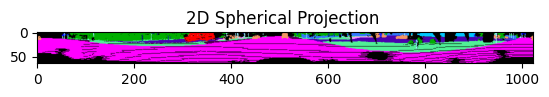

In [ ]:
visualize_spherical_projection(scan.proj_sem_color)

In [ ]:
scan.proj_sem_color.shape

(64, 1024, 3)